# Import libraries

In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [109]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [114]:
filepath = r'dataset/df_ecom_pre_proc.csv'

file_tag = 'df_ecom_pre_proc'

# Load

In [ ]:
## Get sample from dataset 

In [115]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Display the first 100 rows of the DataFrame
print(df.head(100))


df.head(20)


                  event_time event_type      brand   price  \
0  2020-04-27 17:58:24+00:00       view  celestron  342.35   
1  2020-04-15 07:39:15+00:00       view       asus  406.70   
2  2020-04-29 12:25:47+00:00       view        NaN  404.39   
3  2020-04-15 09:56:19+00:00       view      apple  924.09   
4  2020-04-10 12:10:27+00:00       view        NaN    7.20   
..                       ...        ...        ...     ...   
95 2020-04-20 04:46:25+00:00       view  decathlon   39.64   
96 2020-04-03 14:41:05+00:00       view     centek   12.61   
97 2020-04-22 20:29:41+00:00       view      apple  973.68   
98 2020-04-14 07:47:30+00:00       view    defacto   12.84   
99 2020-04-09 14:43:09+00:00       view        NaN  401.27   

   category_code_lvl_1 category_code_lvl_2 category_code_lvl_3    conversion  \
0                  NaN                 NaN                 NaN  not_purchase   
1          electronics               audio           headphone  not_purchase   
2              

event_time event_type             brand   price  \
0  2020-04-27 17:58:24+00:00       view         celestron  342.35   
1  2020-04-15 07:39:15+00:00       view              asus  406.70   
2  2020-04-29 12:25:47+00:00       view               NaN  404.39   
3  2020-04-15 09:56:19+00:00       view             apple  924.09   
4  2020-04-10 12:10:27+00:00       view               NaN    7.20   
5  2020-04-17 18:04:41+00:00       view             irbis  100.39   
6  2020-04-06 19:11:40+00:00       view             hobot  506.83   
7  2020-04-02 05:51:40+00:00       view           samsung  199.92   
8  2020-04-25 17:49:33+00:00       view           samsung  128.42   
9  2020-04-18 04:41:10+00:00       view            hasbro    9.63   
10 2020-04-25 18:52:55+00:00       view         rivertoys  332.05   
11 2020-04-17 05:37:15+00:00       view             apple  601.53   
12 2020-04-15 18:49:15+00:00       view              sony  656.13   
13 2020-04-30 16:55:29+00:00       view            lenovo  488.56   
14 2020-04-16 01:51:40+00:00       view  hotpoint-ariston  437.57   
15 2020-04-28 10:53:45+00:00       view                lg  437.31   
16 2020-04-29 20:04:41+00:00       view            xiaomi  214.43   
17 2020-04-21 10:51:57+00:00       view           polaris   39.87   
18 2020-04-28 10:07:29+00:00       view          moulinex   47.59   
19 2020-04-21 04:15:52+00:00       view           shivaki  208.76   

   category_code_lvl_1 category_code_lvl_2 category_code_lvl_3    conversion  \
0                  NaN                 NaN                 NaN  not_purchase   
1          electronics               audio           headphone  not_purchase   
2                  NaN                 NaN                 NaN  not_purchase   
3         construction               tools               light  not_purchase   
4              apparel               shirt                 NaN  not_purchase   
5           appliances            personal            massager  not_purchase   
6           appliances         environment              vacuum  not_purchase   
7         construction               tools               light  not_purchase   
8         construction               tools               light  not_purchase   
9                 kids                toys                 NaN  not_purchase   
10               sport             trainer                 NaN  not_purchase   
11         electronics              clocks                 NaN  not_purchase   
12             apparel               shoes                 NaN  not_purchase   
13        construction               tools               light  not_purchase   
14          appliances             kitchen                oven  not_purchase   
15          appliances             kitchen       refrigerators  not_purchase   
16        construction               tools               light  not_purchase   
17          appliances             kitchen             blender  not_purchase   
18          appliances             kitchen               mixer  not_purchase   
19          appliances            personal            massager  not_purchase   

    week_of_month is_weekend day_of_week  day  hour  min time_of_day  
0               4    weekday      Monday   27    17   58   afternoon  
1               3    weekday   Wednesday   15     7   39     morning  
2               5    weekday   Wednesday   29    12   25   afternoon  
3               3    weekday   Wednesday   15     9   56     morning  
4               2    weekday      Friday   10    12   10   afternoon  
5               3    weekday      Friday   17    18    4   afternoon  
6               1    weekday      Monday    6    19   11       night  
7               1    weekday    Thursday    2     5   51       night  
8               4    weekend    Saturday   25    17   49   afternoon  
9               3    weekend    Saturday   18     4   41       night  
10              4    weekend    Saturday   25    18   52   afternoon  
11              3    weekday      F

# Data Profiling

## Dimensionality

### Number of records and variables

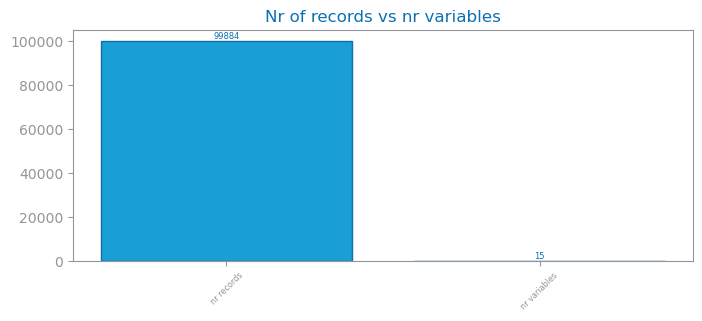

In [116]:
from matplotlib.pyplot import figure, savefig, show


figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

### Missing values

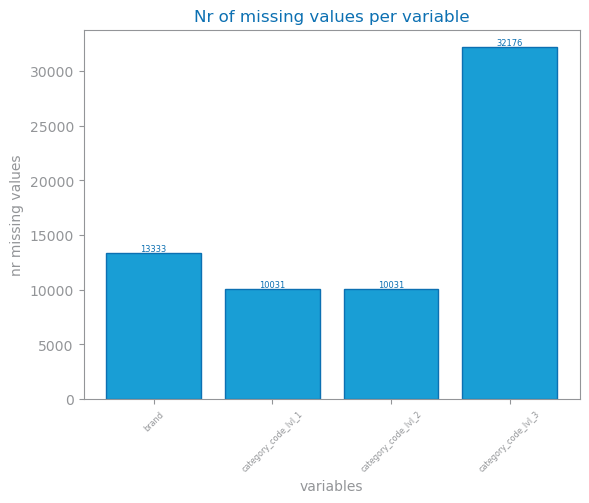

In [117]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99884 entries, 0 to 99883
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   event_time           99884 non-null  datetime64[ns, UTC]
 1   event_type           99884 non-null  object             
 2   brand                86551 non-null  object             
 3   price                99884 non-null  float64            
 4   category_code_lvl_1  89853 non-null  object             
 5   category_code_lvl_2  89853 non-null  object             
 6   category_code_lvl_3  67708 non-null  object             
 7   conversion           99884 non-null  object             
 8   week_of_month        99884 non-null  int64              
 9   is_weekend           99884 non-null  object             
 10  day_of_week          99884 non-null  object             
 11  day                  99884 non-null  int64              
 12  hour              

### Variables Type

In [119]:
df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
brand                               object
price                              float64
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
conversion                          object
week_of_month                        int64
is_weekend                          object
day_of_week                         object
day                                  int64
hour                                 int64
min                                  int64
time_of_day                         object
dtype: object

In [163]:
# Convert the 'event_time' column to a datetime type, ensuring it is in UTC.
# This conversion is necessary because pandas may not automatically recognize the original format as a valid datetime type.

#df['event_time'] = to_datetime(df['event_time'], errors='coerce', utc=True)
#print(df['event_time'].dtype)


datetime64[ns, UTC]


In [118]:
#df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
brand                               object
price                              float64
user_id                              int64
user_session                        object
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
target                              object
dtype: object

In [120]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'day_of_week', 'time_of_day']}


#### Change symbolic columns type, to category (instead of object)

In [121]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

event_time             datetime64[ns, UTC]
event_type                        category
brand                             category
price                              float64
category_code_lvl_1               category
category_code_lvl_2               category
category_code_lvl_3               category
conversion                          object
week_of_month                        int64
is_weekend                          object
day_of_week                       category
day                                  int64
hour                                 int64
min                                  int64
time_of_day                       category
dtype: object

## Distribuition

In [122]:

summary5: df = df.describe(include="all")
summary5

event_time event_type    brand         price  \
count                                 99884      99884    86551  99884.000000   
unique                                  NaN          3     2285           NaN   
top                                     NaN       view  samsung           NaN   
freq                                    NaN      93621    11866           NaN   
mean    2020-04-17 14:32:38.824916992+00:00        NaN      NaN    272.744013   
min               2020-04-01 00:03:37+00:00        NaN      NaN      0.000000   
25%     2020-04-10 22:04:22.750000128+00:00        NaN      NaN     51.460000   
50%        2020-04-18 05:32:53.500000+00:00        NaN      NaN    148.490000   
75%        2020-04-24 18:34:33.500000+00:00        NaN      NaN    345.900000   
max               2020-04-30 23:59:53+00:00        NaN      NaN   2574.070000   
std                                     NaN        NaN      NaN    354.151256   

       category_code_lvl_1 category_code_lvl_2 category_code_lvl_3  \
count                89853               89853               67708   
unique                  13                  59                  86   
top           construction               tools               light   
freq                 25289               24807               21583   
mean                   NaN                 NaN                 NaN   
min                    NaN                 NaN                 NaN   
25%                    NaN                 NaN                 NaN   
50%                    NaN                 NaN                 NaN   
75%                    NaN                 NaN                 NaN   
max                    NaN                 NaN                 NaN   
std                    NaN                 NaN                 NaN   

          conversion  week_of_month is_weekend day_of_week           day  \
count          99884   99884.000000      99884       99884  99884.000000   
unique             2            NaN          2           7           NaN   
top     not_purchase            NaN    weekday    Thursday           NaN   
freq           98409            NaN      73339       17082           NaN   
mean             NaN       2.900204        NaN         NaN     17.106824   
min              NaN       1.000000        NaN         NaN      1.000000   
25%              NaN       2.000000        NaN         NaN     10.000000   
50%              NaN       3.000000        NaN         NaN     18.000000   
75%              NaN       4.000000        NaN         NaN     24.000000   
max              NaN       5.000000        NaN         NaN     30.000000   
std              NaN       1.213068        NaN         NaN      8.370319   

                hour           min time_of_day  
count   99884.000000  99884.000000       99884  
unique           NaN           NaN           3  
top              NaN           NaN   afternoon  
freq             NaN           NaN       40299  
mean       11.479066     29.585980         NaN  
min         0.000000      0.000000         NaN  
25%         7.000000     15.000000         NaN  
50%        11.000000     30.000000         NaN  
75%        16.000000     45.000000         NaN  
max        23.000000     59.000000         NaN  
std         5.375539     17.297688         NaN

In [39]:
var: str = "price"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for price variable:
	Count:  99884.0
	Mean:  273.2030685595291
	StDev:  355.97261165953614
	Min:  0.0
	Q1:  51.46
	Median:  148.98
	Q3:  342.09
	Max:  2574.07


In [123]:
var = "category_code_lvl_1"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])


Summary for category_code_lvl_1 variable:
	Count:  89853
	Unique:  13
	Top:  construction
	Freq:  25289


In [41]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['price'], 'binary': ['conversion'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


### Numeric Values

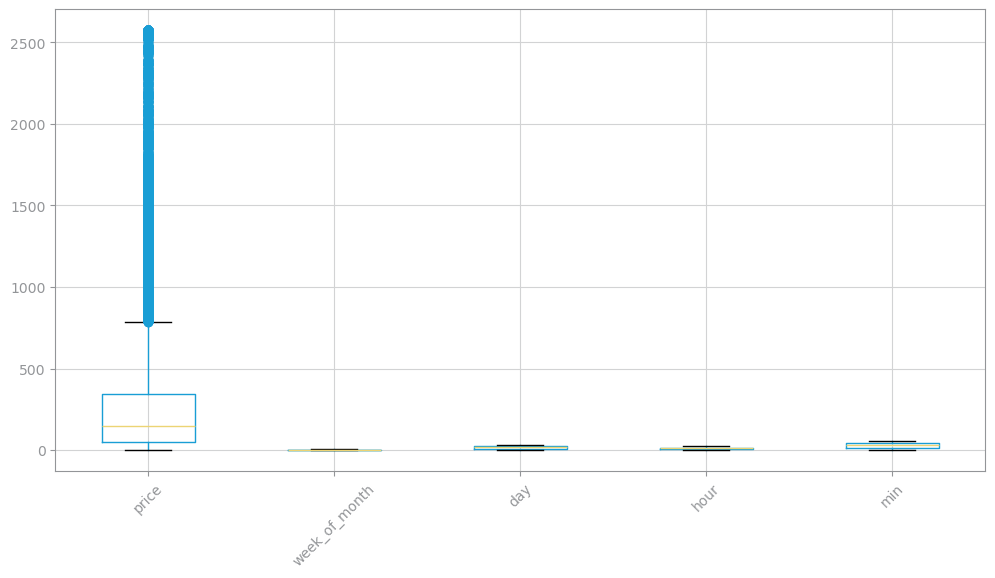

In [124]:
from matplotlib.pyplot import savefig, show

variables_types_numeric: dict[str, list] = get_variable_types(df)

numeric: list[str] = variables_types_numeric["numeric"]
if [] != numeric: #verifica que a lista numeric não está vazia ([]). Se não estiver executa o codigo em baixo
    plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
    df[numeric].boxplot(rot=45)

    #savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

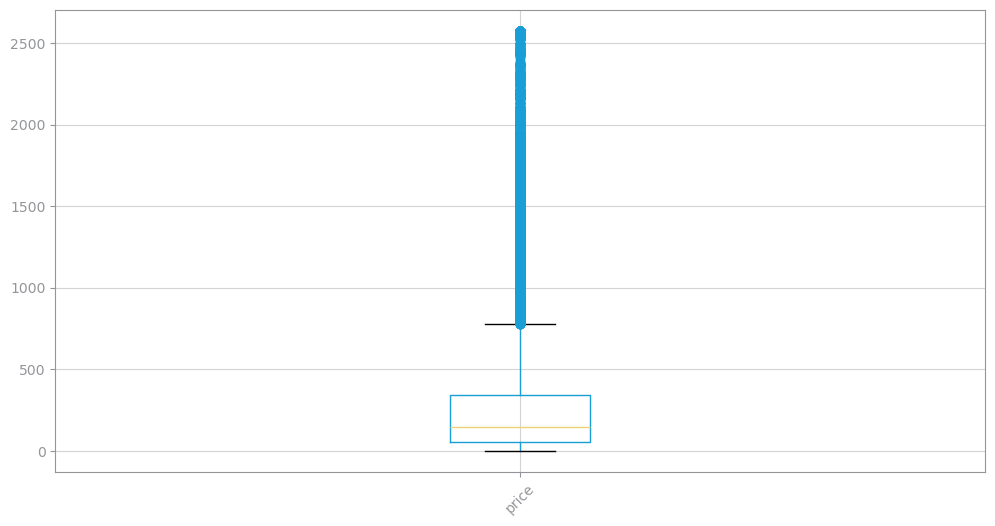

In [43]:
from matplotlib import pyplot as plt

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Filtrar a lista numérica para excluir 'event_time'
numeric: list[str] = [col for col in variables_types["numeric"] if col != 'event_time']

# Verificar se a lista numérica não está vazia
if numeric:
    plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
    df[numeric].boxplot(rot=45)
    #savefig(f"images/{file_tag}_global_boxplot.png")
    plt.show()
else:
    print("There are no numeric variables.")


In [44]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['price'], 'binary': ['conversion'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


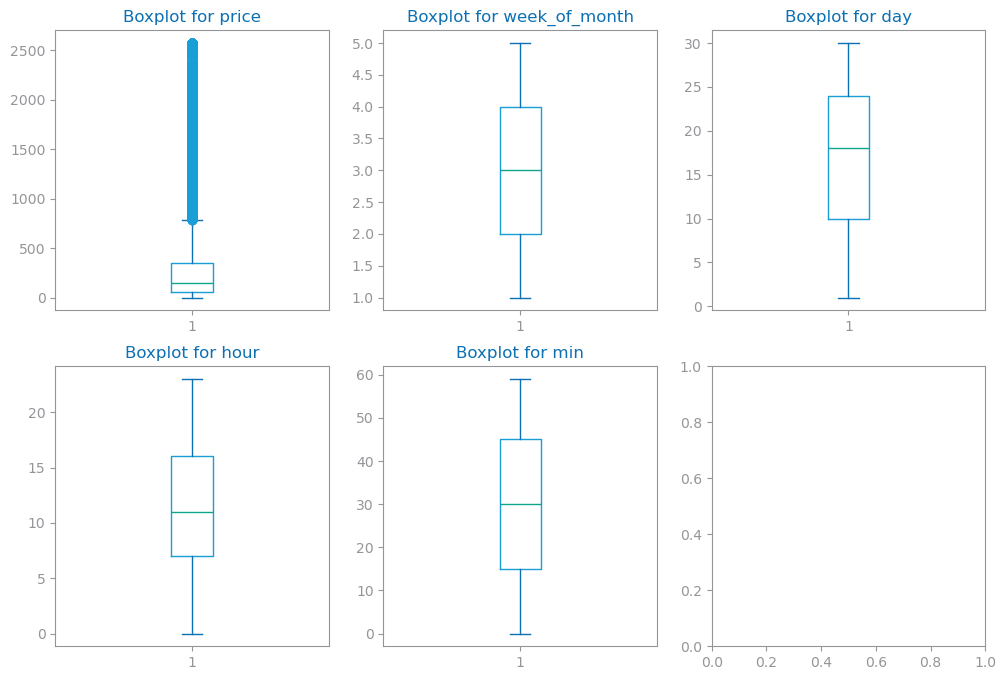

In [125]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")


In [ ]:
##Get insights

### Checking outliers

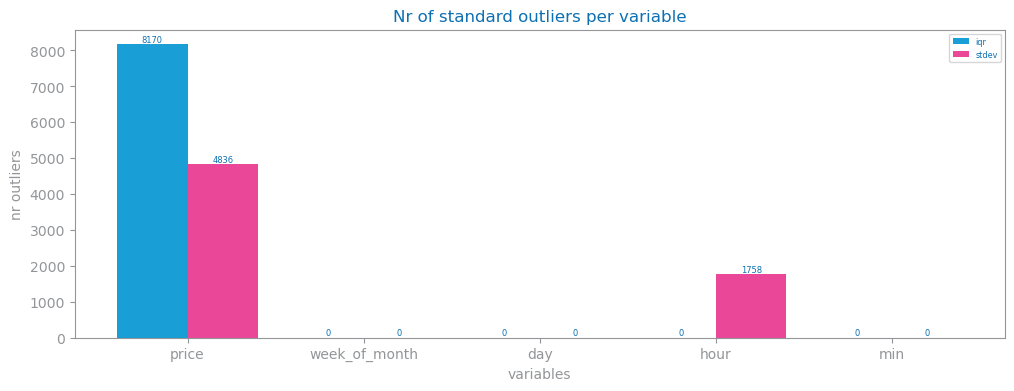

In [127]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

#This is the number of times * Standartdeviation.  
#Outliers are defined as values that are a certain distance from the mean, determined by the number of standard deviations you specified
#the higher the nr_stdev_ less outliers ww will have
NR_STDEV: int = 2


IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom



def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

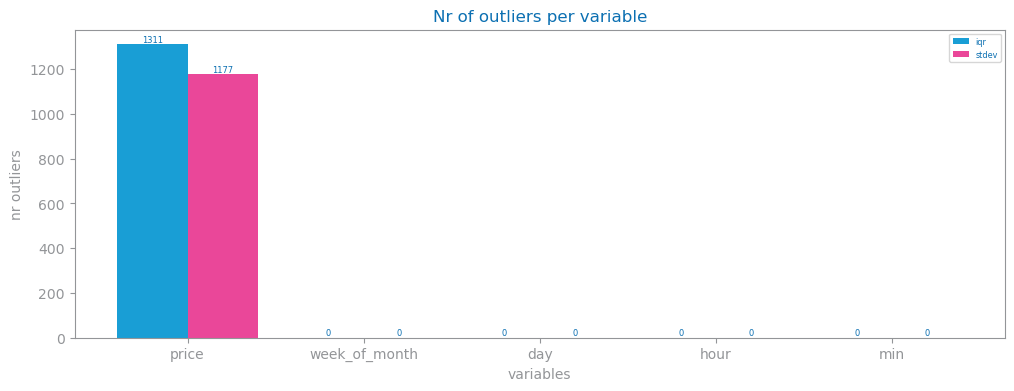

In [90]:
#Here we basically change the nr_stdev and iqr_factor, and we can seeh that the number of outliers decreased
if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric, nrstdev=4, iqrfactor=4.5)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers.png")
    show()
else:
    print("There are no numeric variables.")

### histogram for distribuition

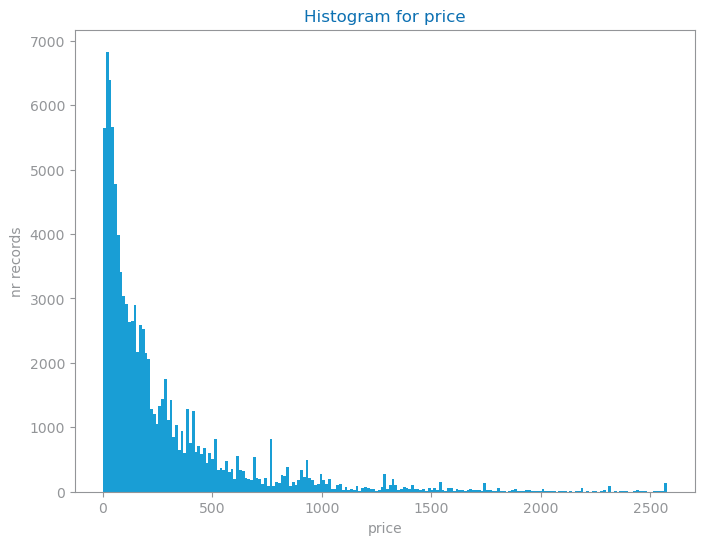

In [129]:
from dslabs_functions import set_chart_labels
import matplotlib.pyplot as plt

# Certificar-se de que a coluna 'price' está em formato numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verificar se a coluna 'price' existe no DataFrame e se é numérica
if 'price' in df.columns and df['price'].dtype in ['float64', 'int64']:
    fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho do gráfico

    # Definir os rótulos do gráfico
    set_chart_labels(
        ax,
        title="Histogram for price",
        xlabel="price",
        ylabel="nr records"
    )
    
    # Gerar o histograma para a coluna 'price'
    ax.hist(df['price'].dropna().values, bins='auto')
    
    # Exibir o gráfico
    plt.show()
else:
    print("A coluna 'price' não está disponível ou não é numérica.")

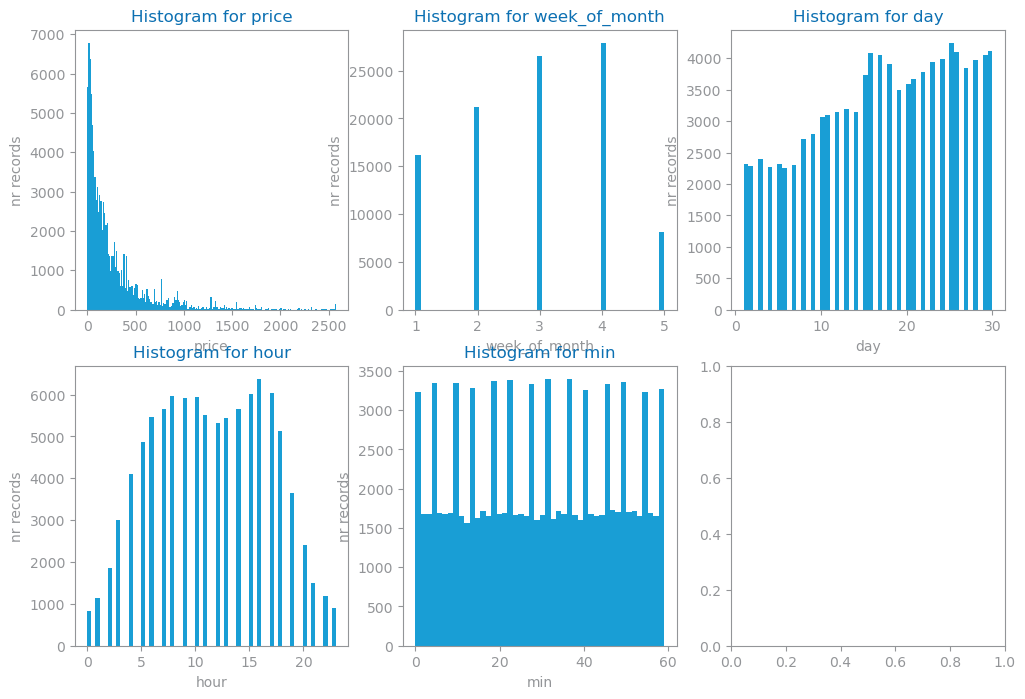

In [92]:
from dslabs_functions import set_chart_labels


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

### Symbolic variables

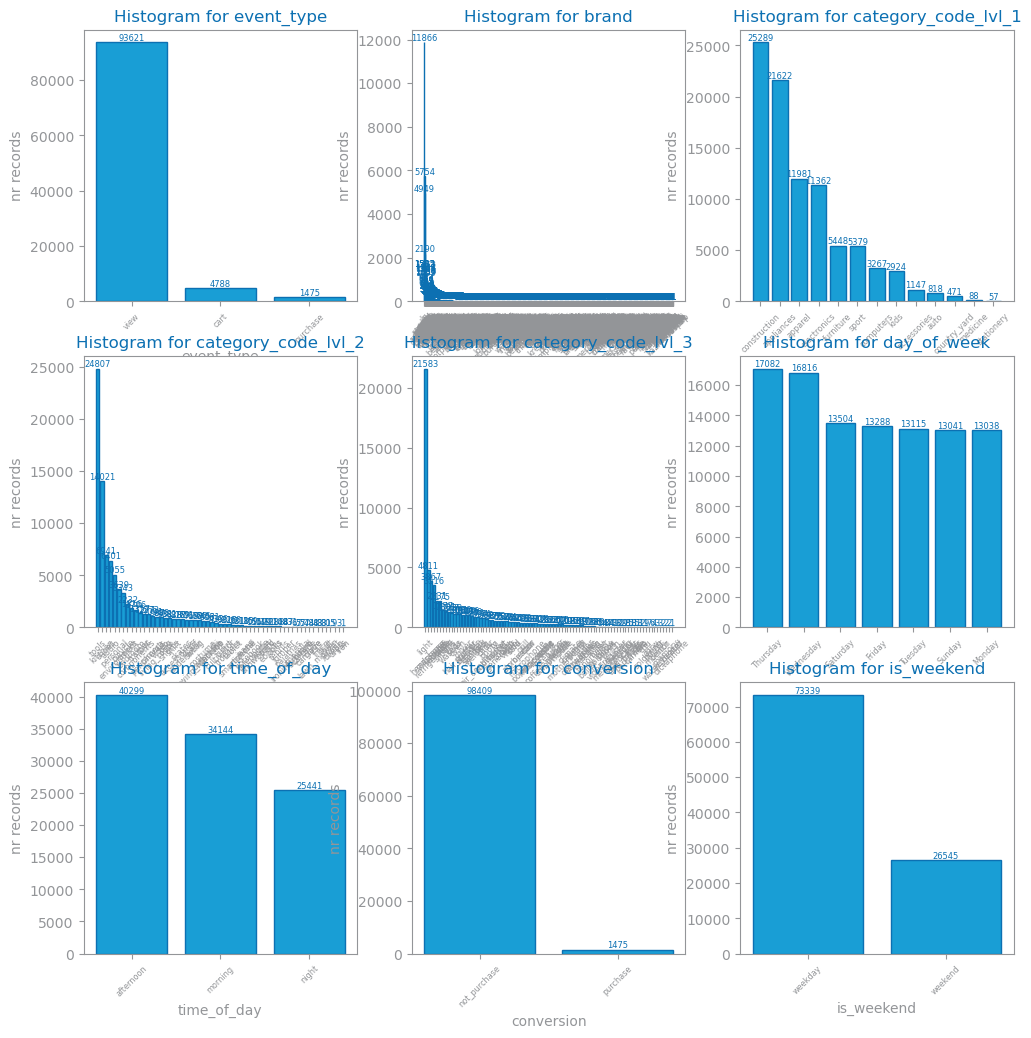

In [130]:
from dslabs_functions import plot_bar_chart

variables_types: dict[str, list] = get_variable_types(df)

symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

### Balancing and Class distribution


conversion
not_purchase    98409
purchase         1475
Name: count, dtype: int64


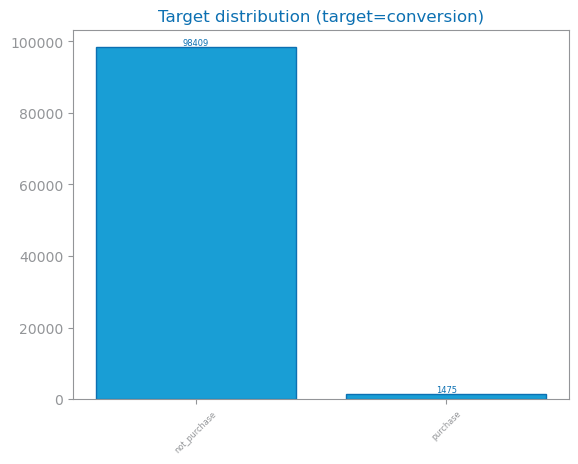

In [131]:
from matplotlib.pyplot import savefig, show
target = "conversion"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

## Granularity

In [53]:
def derive_date_variables(df: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        df[date + "_year"] = df[date].dt.year
        df[date + "_quarter"] = df[date].dt.quarter
        df[date + "_month"] = df[date].dt.month
        df[date + "_day"] = df[date].dt.day
    return df

In [54]:
print(df.dtypes)


event_time             datetime64[ns, UTC]
event_type                        category
brand                             category
price                              float64
category_code_lvl_1               category
category_code_lvl_2               category
category_code_lvl_3               category
conversion                          object
dtype: object


In [55]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        try:
            if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
                variable_types["binary"].append(c)
            elif df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                # Tenta converter para numérico
                df[c] = to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
        except (ValueError, TypeError):
            try:
                # Tenta converter para datetime
                df[c] = to_datetime(df[c], errors="raise")
                variable_types["date"].append(c)
            except (ValueError, TypeError):
                variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)


{'numeric': ['price'], 'binary': ['conversion'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


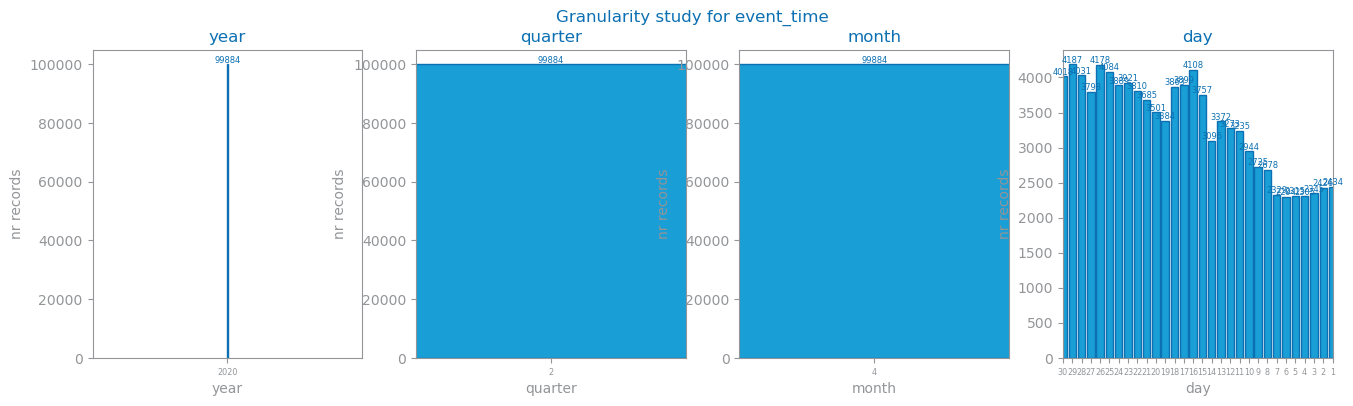

In [56]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
from dslabs_functions import plot_bar_chart, HEIGHT


def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

variables_types: dict[str, list] = get_variable_types(df)
data_ext: DataFrame = derive_date_variables(df, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(df, v_date, ["year", "quarter", "month", "day"])
    #savefig(f"images/{file_tag}_granularity_{v_date}.png")
    show()

In [57]:
# Verifica se a coluna 'event_time' é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Cria uma nova coluna para armazenar a data sem a hora
    df['event_date'] = df['event_time'].dt.date

    # Conta o número de dias únicos
    num_unique_days = df['event_date'].nunique()

    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")


Número de dias únicos: 30


## Sparsity

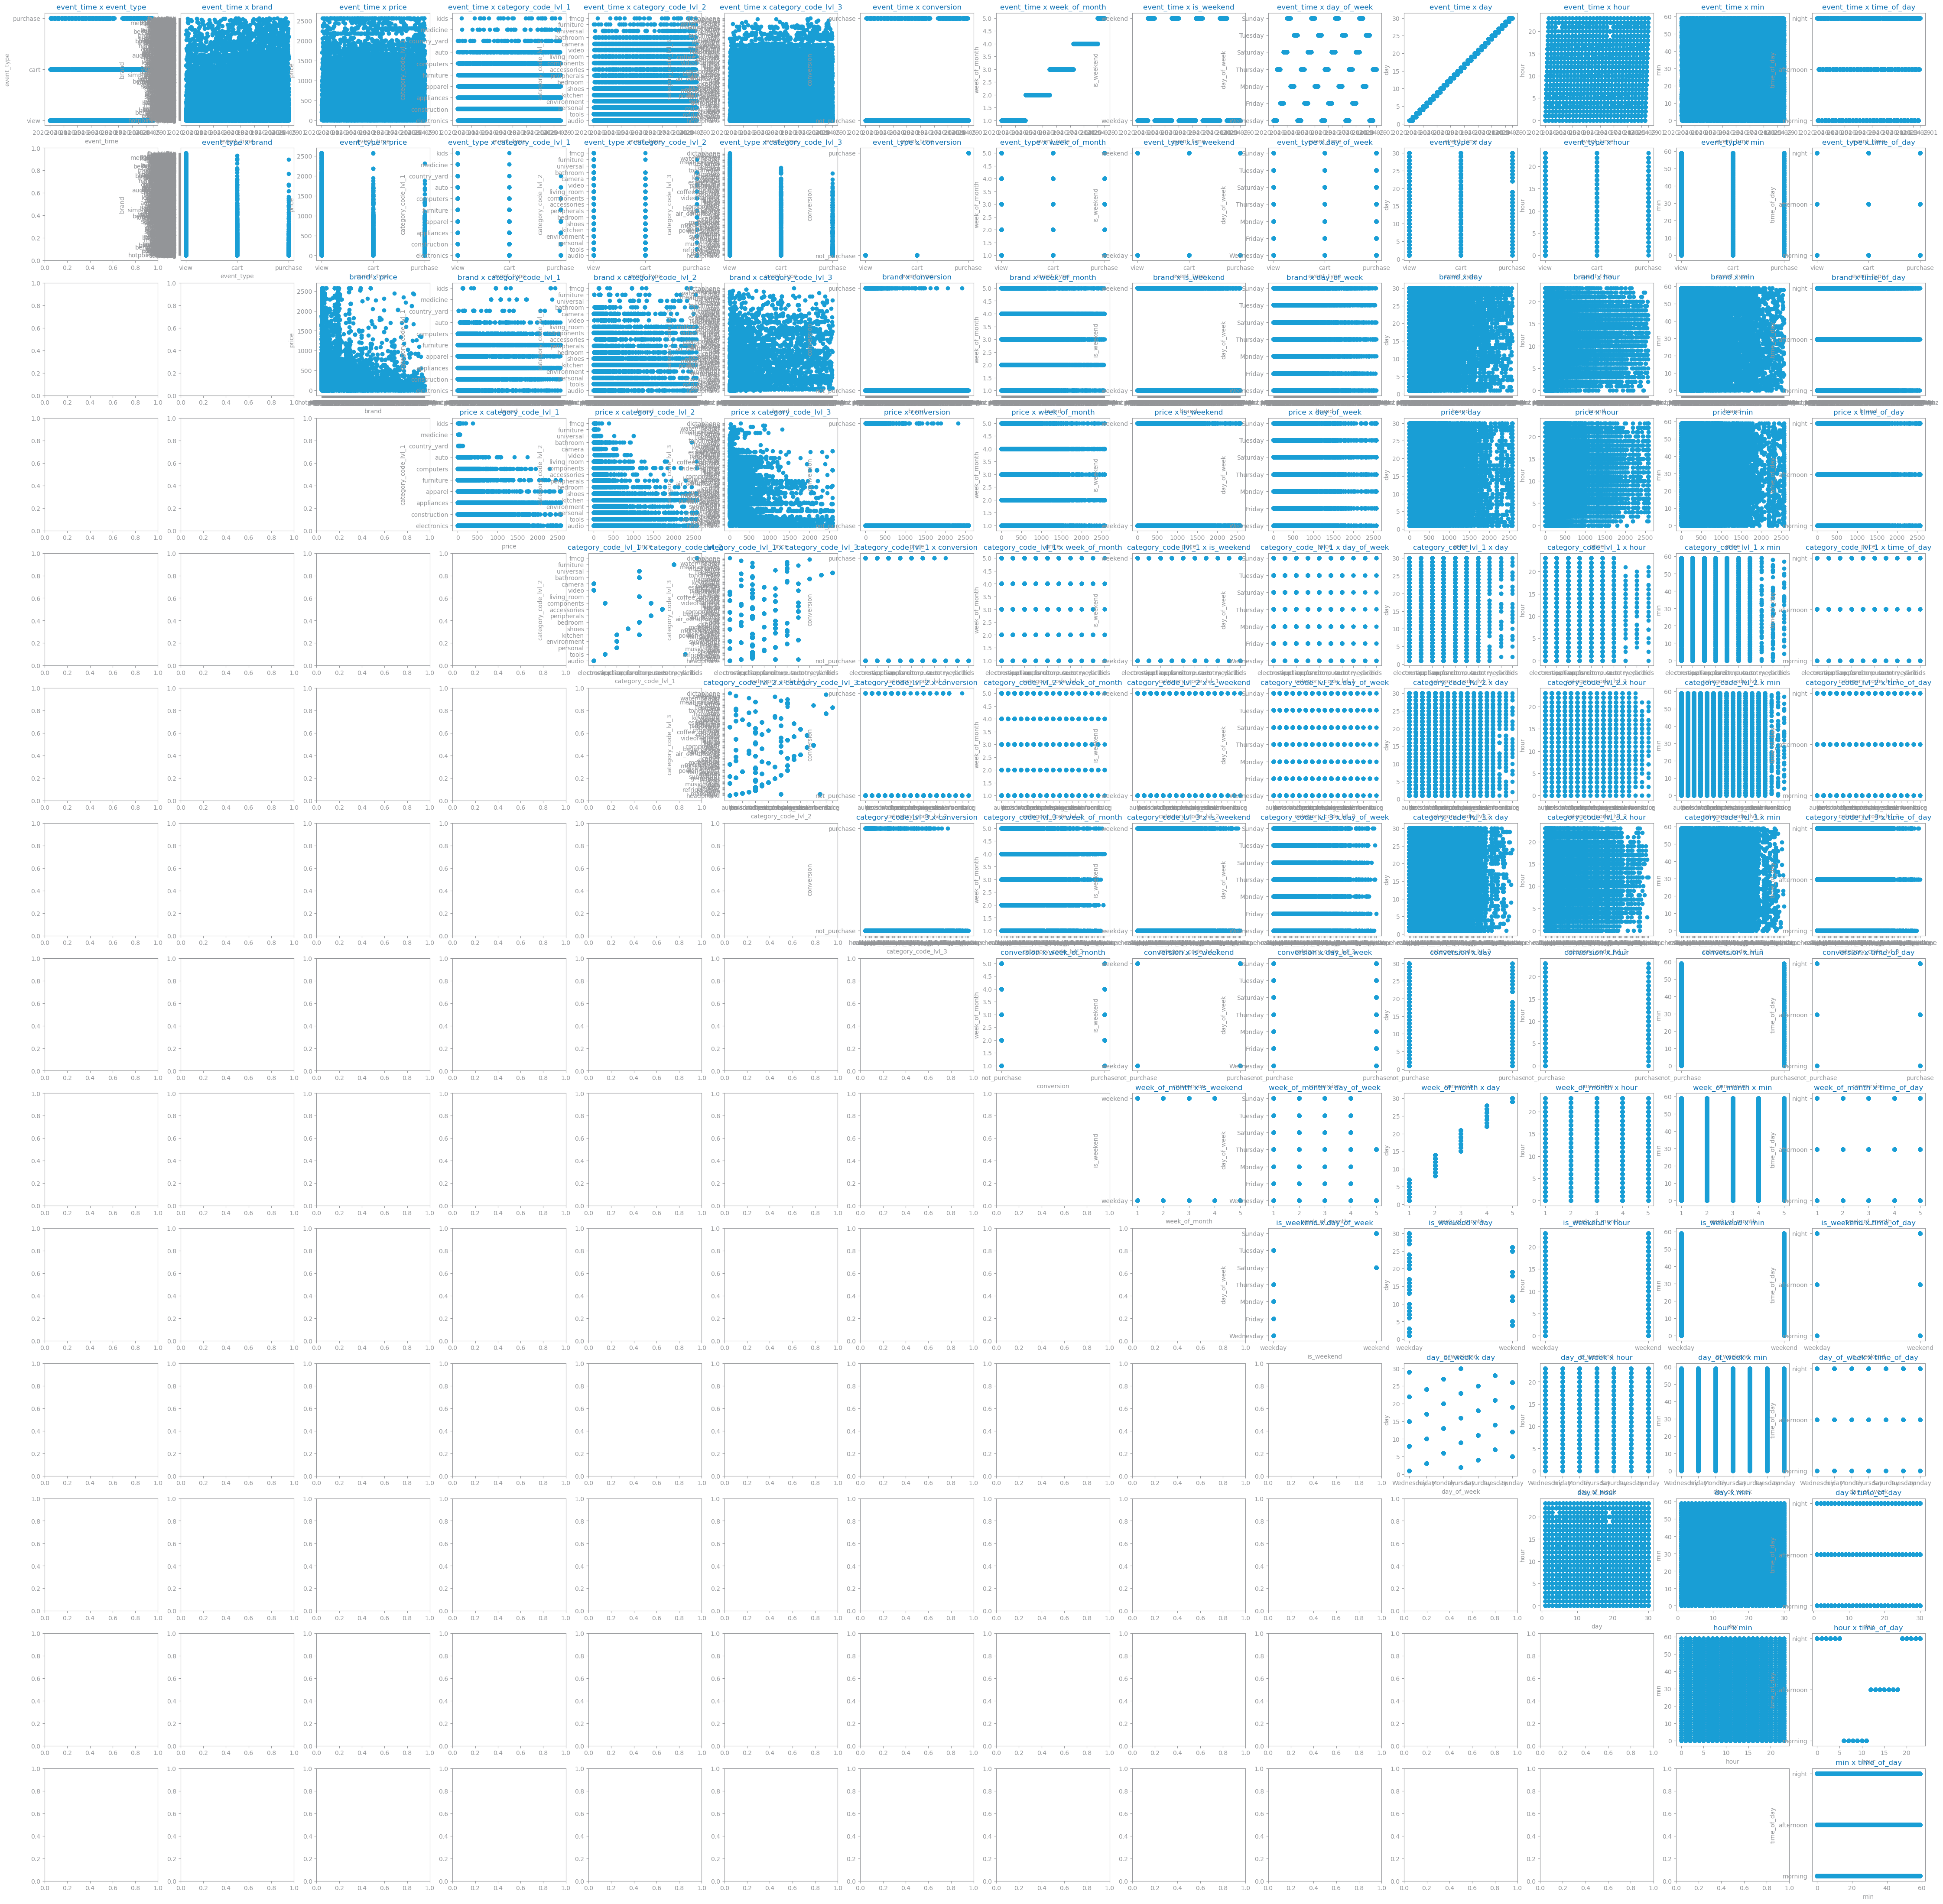

In [132]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart


df = df.dropna()

vars: list = df.columns.to_list()
if [] != vars:
    target = "stroke"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    #savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")

In [59]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

# Remover valores nulos
df = df.dropna()

# Obter a lista de colunas
vars: list = df.columns.to_list()

if [] != vars:
    target = "stroke"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    
    # Aumentar o tamanho de cada gráfico multiplicando o HEIGHT por 2
    fig, axs = subplots(n, n, figsize=(n * HEIGHT * 2, n * HEIGHT * 2), squeeze=False)
    
    # Iterar sobre as variáveis e criar os subplots
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    
    # Melhorar o layout para que os gráficos não se sobreponham
    fig.tight_layout()

    # Mostrar os gráficos
    # savefig(f"images/{file_tag


## Insights